# MASKING

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Numpy reassignment
img1 = cv2.imread('DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

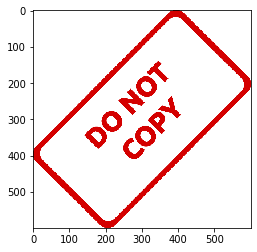

In [4]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

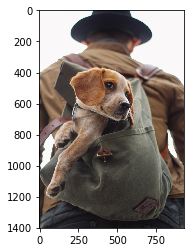

In [5]:
plt.imshow(img1)

In [6]:
img1.shape

(1401, 934, 3)

In [7]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [9]:
img2.shape

(600, 600, 3)

In [10]:
rows, cols, channels = img2.shape

In [11]:
roi = img1[y_offset:1401, x_offset:934]

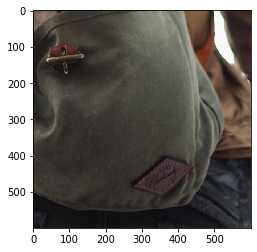

In [13]:
# region of interest
plt.imshow(roi)

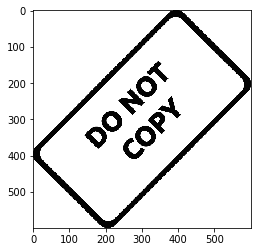

In [16]:
# mask to stract only de red region of the img2
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,'gray')

In [17]:
mask_inv = cv2.bitwise_not(img2gray)

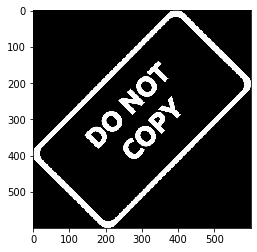

In [19]:
plt.imshow(mask_inv,'gray')

In [20]:
import numpy as np

In [21]:
white_brackground = np.full(img2.shape,255,dtype=np.uint8)

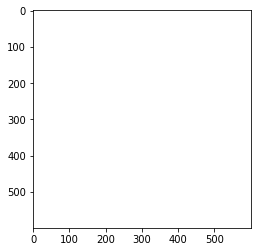

In [22]:
plt.imshow(white_brackground)

In [23]:
bk = cv2.bitwise_or(white_brackground,white_brackground,mask=mask_inv)

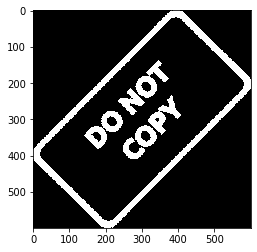

In [24]:
plt.imshow(bk)

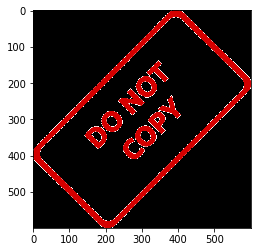

In [25]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

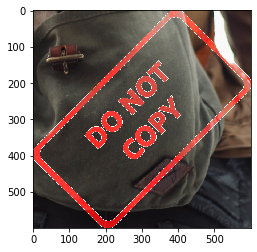

In [26]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [28]:
large_img = img1
small_img = final_roi

In [29]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

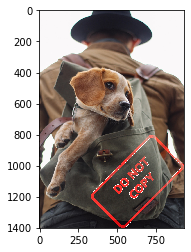

In [30]:
plt.imshow(large_img)